In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import pandas as pd

In [3]:
mean_01=np.array([1,0.5])
cov_1=np.array([[1,0.1],[0.1,0.4]])
mean_02=np.array([5,5.5])
cov_02=np.array([[1.2,0.1],[0.1,1.3]])

In [4]:
dist_1=np.random.multivariate_normal(mean_01,cov_1,400)
dist_2=np.random.multivariate_normal(mean_02,cov_02,400)

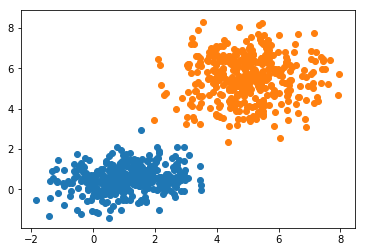

In [5]:
plt.scatter(dist_1[:,0],dist_1[:,1])
plt.scatter(dist_2[:,0],dist_2[:,1])

In [6]:
data1=np.zeros((400,1))
data2=np.ones((400,1))

In [7]:
dist_1=np.hstack((dist_1,data1))
dist_2=np.hstack((dist_2,data2))

In [99]:
data=np.vstack((dist_1,dist_2))

In [100]:
dist_1.shape

(400, 3)

In [101]:
dist_2.shape

(400, 3)

In [102]:
data.shape

(800, 3)

In [103]:
np.random.shuffle(data)
data_NEW=data[:,:-1]

In [128]:
#dataNormalise
u=np.mean(data_NEW,axis=0)
sigma=np.std(data_NEW,axis=0)
data_NEW=(data_NEW-u)/sigma

In [129]:
a=data[:,2].reshape((800,1))

In [132]:
np.hstack((data_NEW,a))

array([[ 1.15904026,  1.41318088,  1.        ],
       [-1.29216215, -1.23533754,  0.        ],
       [-0.30447669, -0.96935072,  0.        ],
       ...,
       [ 0.67958967,  1.13663254,  1.        ],
       [-0.90207824, -0.83569604,  0.        ],
       [ 1.83064038,  1.05449747,  1.        ]])

In [136]:
ones=np.ones((800,1))
final_data=np.hstack((ones,data))

In [137]:
final_data

array([[ 1.        ,  5.62006396,  6.79560432,  1.        ],
       [ 1.        ,  0.12498361, -0.27588858,  0.        ],
       [ 1.        ,  2.33916672,  0.43429109,  0.        ],
       ...,
       [ 1.        ,  4.54523656,  6.05722561,  1.        ],
       [ 1.        ,  0.99946972,  0.79114647,  0.        ],
       [ 1.        ,  7.12565019,  5.83792658,  1.        ]])

In [138]:
split=int(0.8*800)
print(split)

640


In [162]:
X_Train=final_data[:split,:-1]#640,3
Y_Train=final_data[:split,-1] #640,1
X_Test=final_data[split:,:-1] #160,3
Y_out=final_data[split:,-1]   #160,1
theta=np.zeros((X_Train.shape[1],1))

In [165]:
type(X_Train)

numpy.ndarray

In [212]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [228]:
def hypothesis(x,theta):
    return sigmoid(np.dot(x,theta))

In [229]:
theta.shape

(3, 1)

In [221]:
X_Train.shape

(640, 3)

In [222]:
def error(X,Y,theta):
    m=X.shape[0]
    error=0.0
    for i in range(m):
        y_hat=hypothesis(X[i],theta)
        error+=Y[i]*np.log2(y_hat)+(1-Y[i])*np.log2(1-y_hat)
    return -error/m

In [223]:

def get_grad(X,Y,theta):
    grad=np.zeros((theta.shape[0],1))
    for i in range(X.shape[0]):
        y_hat=hypothesis(X,theta)
        x=X[i].reshape((-1,1))
        grad=(Y[i]-y_hat)*x
    return grad/m

In [231]:
def theta_update(X,Y,lr=0.01,max_s=100):
    error_list=[]
    theta=np.zeros((X_Train.shape[1],1))
    for i in range(max_s):
        b=error(X_Train,Y_Train,theta)
        grad=get_grad(X_Train,Y_Train,theta)
        theta=theta-lr*grad #grad=diff of loss funciton = np.sum((y_hat-y[i])*X[i])
        error_list.append(b)
    return theta,b

In [232]:
A,B=theta_update(X_Train,Y_Train)

ValueError: operands could not be broadcast together with shapes (640,1) (3,1) 

In [176]:
Y_Train.shape

(640,)

In [193]:
X_Train.shape

(640, 3)

In [194]:
theta.shape

(3, 1)

In [196]:
np.dot(X_Train,theta).shape
    

(640, 1)